<a href="https://colab.research.google.com/github/rizkynalfian/Classification_Bank_Marketing_RandomForest-Naivebayes/blob/master/Random_Forest_Clasifier_vs_Naive_Bayes_Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Klasifikasi Algoritma Random Forest Classifier dan Naive Bayes Classifier dengan Menggunakan Data Bank marketing**

Telkom DTI Rizky Nur Alfian DS0125

Model klasifikasi ini akan melakukan perbandingan performa dari dua algoritma yaitu random forest classifier dan naive bayes classifier. Data yang digunakan adalah bank marketing dataset dari https://www.kaggle.com/janiobachmann/bank-marketing-dataset .


**Deskripsi Dataset**

*   age: (numeric)
*   job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
*   marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

*   education: (categorical: primary, secondary, tertiary and unknown)

* default: has credit in default? (categorical: 'no','yes','unknown')

* housing: has housing loan? (categorical: 'no','yes','unknown')

* loan: has personal loan? (categorical: 'no','yes','unknown')

* balance: Balance of the individual.

* contact: contact communication type (categorical: 'cellular','telephone')

* month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

* day: last contact day of the month (numeric: 1,2,3,....29,30)

* duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

* previous: number of contacts performed before this campaign and for this client (numeric)

* poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

* deposit - has the client subscribed a term deposit? (binary: 'yes','no')

**Menyiapkan Data**

import semua library yang dibutuhkan untuk membangun model 

In [ ]:
import pandas as pd
from sklearn.preprocessing import onehotEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

mengimport dataset bank dari github 

In [65]:
df_bank = pd.read_csv('https://raw.githubusercontent.com/rizkynalfian/Classification_Bank_Marketing_RandomForest-Naivebayes/master/bank.csv', sep = ',')
df_bank

df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Menampilkan informasi dari data set Bank Marketing

In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


menampilkan descriptive statistics:

In [ ]:

df_bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


**Preprocessing Data**

cek apakah ada data yang kosong? untuk dataset bank ini dapat dilihat bahwa semua data sudah terisi, tidak ada yang kosong :

In [ ]:
# Check for Missing Values
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
cols = df_bank.columns
num_cols= df_bank._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
df_bank[cat_cols]

,contact,default,marital,housing,education,loan,job,poutcome,month,deposit
0,unknown,no,married,yes,secondary,no,admin.,unknown,may,yes
1,unknown,no,married,no,secondary,no,admin.,unknown,may,yes
2,unknown,no,married,yes,secondary,no,technician,unknown,may,yes
3,unknown,no,married,yes,secondary,no,services,unknown,may,yes
4,unknown,no,married,no,tertiary,no,admin.,unknown,may,yes
...,...,...,...,...,...,...,...,...,...,...
11157,cellular,no,single,yes,primary,no,blue-collar,unknown,apr,no
11158,unknown,no,married,no,secondary,no,services,unknown,jun,no
11159,cellular,no,single,no,secondary,no,technician,unknown,aug,no
11160,cellular,no,married,no,secondary,yes,technician,failure,may,no


In [ ]:
data1 = df_bank[cat_cols].apply(LabelEncoder().fit_transform)
data1

,contact,default,marital,housing,education,loan,job,poutcome,month,deposit
0,2,0,1,1,1,0,0,3,8,1
1,2,0,1,0,1,0,0,3,8,1
2,2,0,1,1,1,0,9,3,8,1
3,2,0,1,1,1,0,7,3,8,1
4,2,0,1,0,2,0,0,3,8,1
...,...,...,...,...,...,...,...,...,...,...
11157,0,0,2,1,0,0,1,3,0,0
11158,2,0,1,0,1,0,7,3,6,0
11159,0,0,2,0,1,0,9,3,1,0
11160,0,0,1,0,1,1,9,0,8,0


In [ ]:
dataf = data1.join(df_bank[num_cols])
dataf

,contact,default,marital,housing,education,loan,job,poutcome,month,deposit,age,balance,day,duration,campaign,pdays,previous
0,2,0,1,1,1,0,0,3,8,1,59,2343,5,1042,1,-1,0
1,2,0,1,0,1,0,0,3,8,1,56,45,5,1467,1,-1,0
2,2,0,1,1,1,0,9,3,8,1,41,1270,5,1389,1,-1,0
3,2,0,1,1,1,0,7,3,8,1,55,2476,5,579,1,-1,0
4,2,0,1,0,2,0,0,3,8,1,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0,0,2,1,0,0,1,3,0,0,33,1,20,257,1,-1,0
11158,2,0,1,0,1,0,7,3,6,0,39,733,16,83,4,-1,0
11159,0,0,2,0,1,0,9,3,1,0,32,29,19,156,2,-1,0
11160,0,0,1,0,1,1,9,0,8,0,43,0,8,9,2,172,5


In [ ]:
dataf[dataf.pdays == -1]

,contact,default,marital,housing,education,loan,job,poutcome,month,deposit,age,balance,day,duration,campaign,pdays,previous
0,2,0,1,1,1,0,0,3,8,1,59,2343,5,1042,1,-1,0
1,2,0,1,0,1,0,0,3,8,1,56,45,5,1467,1,-1,0
2,2,0,1,1,1,0,9,3,8,1,41,1270,5,1389,1,-1,0
3,2,0,1,1,1,0,7,3,8,1,55,2476,5,579,1,-1,0
4,2,0,1,0,2,0,0,3,8,1,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,0,0,2,1,1,0,1,3,5,0,34,-72,7,273,5,-1,0
11157,0,0,2,1,0,0,1,3,0,0,33,1,20,257,1,-1,0
11158,2,0,1,0,1,0,7,3,6,0,39,733,16,83,4,-1,0
11159,0,0,2,0,1,0,9,3,1,0,32,29,19,156,2,-1,0


In [ ]:
dataf.pdays.value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 587       1
 579       1
 515       1
 491       1
 683       1
Name: pdays, Length: 472, dtype: int64

In [ ]:
dataf.corr()

,contact,default,marital,housing,education,loan,job,poutcome,month,deposit,age,balance,day,duration,campaign,pdays,previous
contact,1.000000,0.035709,-0.060456,0.226392,-0.132540,0.006829,-0.087915,0.257993,0.289803,-0.249847,0.027762,-0.027295,0.007943,-0.018000,0.059258,-0.227785,-0.169919
default,0.035709,1.000000,-0.014691,0.011076,-0.010709,0.076434,-0.007066,0.042357,0.000950,-0.040680,-0.011425,-0.060954,0.017342,-0.009760,0.030975,-0.036282,-0.035273
marital,-0.060456,-0.014691,1.000000,-0.036345,0.125845,-0.062029,0.078314,-0.039424,-0.004070,0.067610,-0.442782,-0.002138,-0.003642,0.006781,-0.030794,0.031200,0.031281
housing,0.226392,0.011076,-0.036345,1.000000,-0.109168,0.076761,-0.136965,-0.046370,0.219602,-0.203888,-0.168700,-0.077092,-0.014770,0.035051,0.006660,0.064497,-0.000840
education,-0.132540,-0.010709,0.125845,-0.109168,1.000000,-0.073154,0.147046,-0.040262,-0.055868,0.095948,-0.126018,0.051728,0.016759,-0.019122,-0.005327,0.025165,0.022427
loan,0.006829,0.076434,-0.062029,0.076761,-0.073154,1.000000,-0.067092,0.026344,0.025329,-0.110580,-0.031418,-0.084589,0.017269,-0.001914,0.034722,-0.030416,-0.022668
job,-0.087915,-0.007066,0.078314,-0.136965,0.147046,-0.067092,1.000000,-0.004238,-0.076011,0.063395,-0.031603,0.028736,0.026589,0.002432,0.003104,-0.003385,0.012665
poutcome,0.257993,0.042357,-0.039424,-0.046370,-0.040262,0.026344,-0.004238,1.000000,-0.042456,-0.122369,-0.002699,-0.027151,0.080221,0.042171,0.112127,-0.806533,-0.549333
month,0.289803,0.000950,-0.004070,0.219602,-0.055868,0.025329,-0.076011,-0.042456,1.000000,-0.037121,-0.026130,0.007264,-0.019840,-0.006482,-0.098123,0.033631,0.029283
deposit,-0.249847,-0.040680,0.067610,-0.203888,0.095948,-0.110580,0.063395,-0.122369,-0.037121,1.000000,0.034901,0.081129,-0.056326,0.451919,-0.128081,0.151593,0.139867


membagi data test 80% dan data train 20%

In [ ]:
X = dataf.drop('deposit',axis=1)
y = dataf['deposit']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=101)

**Random Forest Classifier**

inisialisasi parameter algoritma Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=50,max_depth=5, random_state=101,max_leaf_nodes=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [53]:
y_pred1 = rfc.predict(X_test)

In [ ]:
estimator = rfc.estimators_[5]
# Export as dot file
export_graphviz(estimator, 
                out_file='tree1.dot', 
                feature_names = X_train.columns,
                class_names = 'deposit',
                rounded = True, proportion = False, 
                precision = 2, filled = True)


menampilkan forest / kumpulan dari tree yang sudah dibuat

In [ ]:
os.system('dot -Tpng tree1.dot -o tree1.png')

0

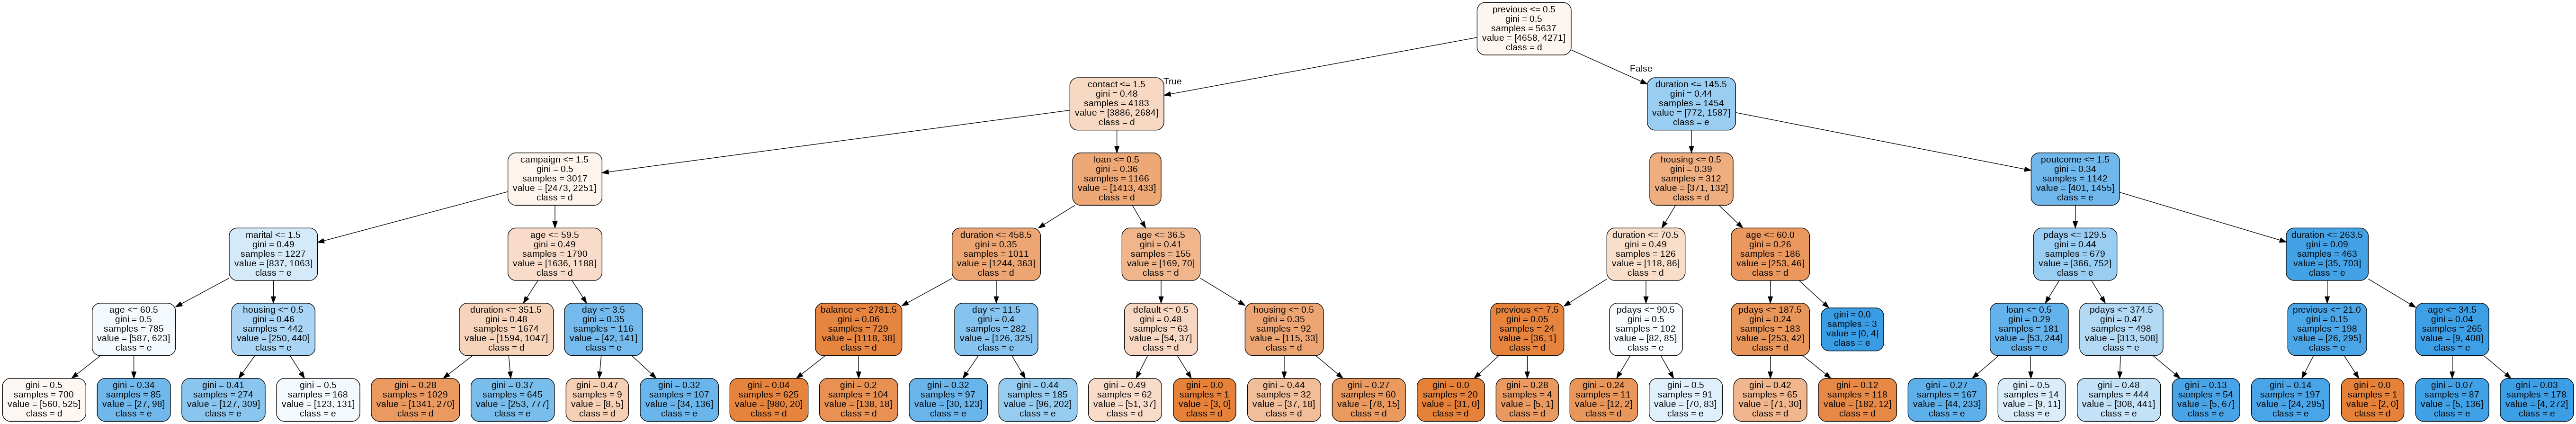

In [ ]:
Image(filename = 'tree1.png')

menampilkan nilai akurasi, precission, recall, F1 score dan cohens kappa score untuk model random forest :

In [54]:
cm = metrics.confusion_matrix(y_test, y_pred1)
cm

array([[962, 219],
       [192, 860]])

In [55]:
# Show the Accuracy, Precision, Recall
acc_rf = metrics.accuracy_score(y_test, y_pred1)
prec_rf = metrics.precision_score(y_test, y_pred1)
rec_rf = metrics.recall_score(y_test, y_pred1)
f1_rf = metrics.f1_score(y_test, y_pred1)
kappa_rf = metrics.cohen_kappa_score(y_test, y_pred1)

print("Accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", rec_rf)
print("F1 Score:", f1_rf)
print("Cohens Kappa Score:", kappa_rf)

Accuracy: 0.8159426780116436
Precision: 0.7970342910101946
Recall: 0.8174904942965779
F1 Score: 0.8071328015016425
Cohens Kappa Score: 0.6311697069533623


membuat kurva ROC untuk random forest classifier

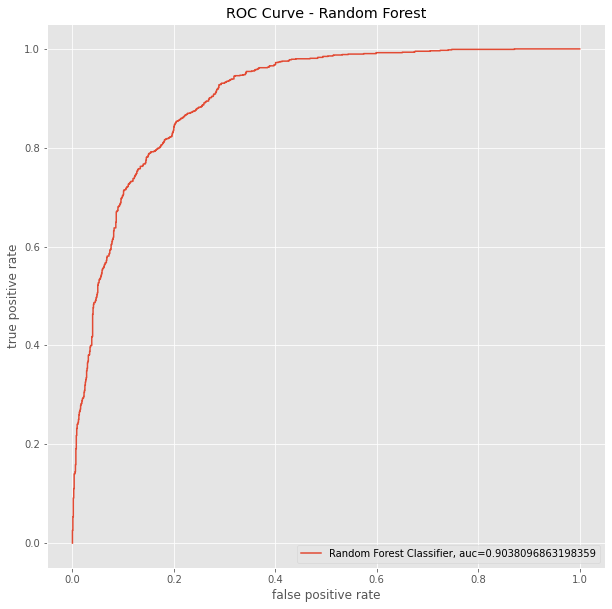

In [56]:
# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred1_proba = rfc.predict_proba(X_test)[::,1]
fprrfc, tprrfc, _ = metrics.roc_curve(y_test,  y_pred1_proba)
aucrfc = metrics.roc_auc_score(y_test, y_pred1_proba)
plt.plot(fprrfc,tprrfc,label="Random Forest Classifier, auc="+str(aucrfc))
plt.title('ROC Curve - Random Forest')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

# **Naive Bayes Classifier**

In [57]:
# Modeling Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict to Test Data
y_pred_gnb= gnb.predict(X_test)

In [58]:
# Show the Confussion Matrix
cm_gnb = metrics.confusion_matrix(y_test, y_pred_gnb)
cm_gnb

array([[876, 305],
       [234, 818]])

menampilkan nilai akurasi, precission, recall, F1 score dan cohens kappa score dari model naive bayes classfier:

In [59]:
acc_gnb = metrics.accuracy_score(y_test, y_pred_gnb)
prec_gnb = metrics.precision_score(y_test, y_pred_gnb)
rec_gnb = metrics.recall_score(y_test, y_pred_gnb)
f1_gnb = metrics.f1_score(y_test, y_pred_gnb)
kappa_gnb = metrics.cohen_kappa_score(y_test, y_pred_gnb)

print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb)
print("Recall:", rec_gnb)
print("F1 Score:", f1_gnb)
print("Cohens Kappa Score:", kappa_gnb)

Accuracy: 0.7586206896551724
Precision: 0.7284060552092609
Recall: 0.7775665399239544
F1 Score: 0.752183908045977
Cohens Kappa Score: 0.5174036871943393


menampilkan kurva ROC naive bayes classifier

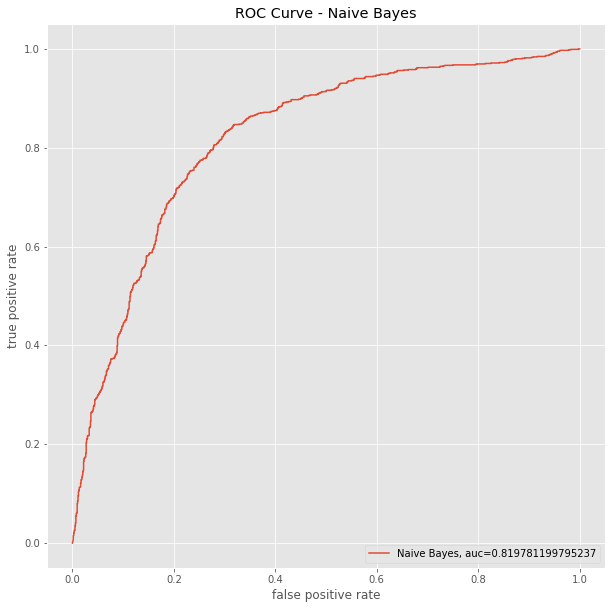

In [60]:
# ROC Curve
y_pred_gnb_proba = gnb.predict_proba(X_test)[::,1]
fprgnb, tprgnb, _ = metrics.roc_curve(y_test,  y_pred_gnb_proba)
aucgnb = metrics.roc_auc_score(y_test, y_pred_gnb_proba)
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

# **Evaluation**

menampilkan performa dari algoritma random forest classifier dan naive bayes classifier

In [61]:
# Comparing Model Performance
print("Random Forest Accuracy =",acc_rf)
print("Random Forest Precision =",prec_rf)
print("Random Forest Recall =",rec_rf)
print("Random Forest F1-Score =", f1_rf)
print("_______________________")
print("Naive Bayes Accuracy =", acc_gnb)
print("Naive Bayes Precision =", prec_gnb)
print("Naive Bayes Recall =", rec_gnb)
print("Naive Bayes F1-Score =", f1_gnb)

Random Forest Accuracy = 0.8159426780116436
Random Forest Precision = 0.7970342910101946
Random Forest Recall = 0.8174904942965779
Random Forest F1-Score = 0.8071328015016425
_______________________
Naive Bayes Accuracy = 0.7586206896551724
Naive Bayes Precision = 0.7284060552092609
Naive Bayes Recall = 0.7775665399239544
Naive Bayes F1-Score = 0.752183908045977


menampilkan kurva ROC dari algoritma random forest classifier dan naive bayes classifier

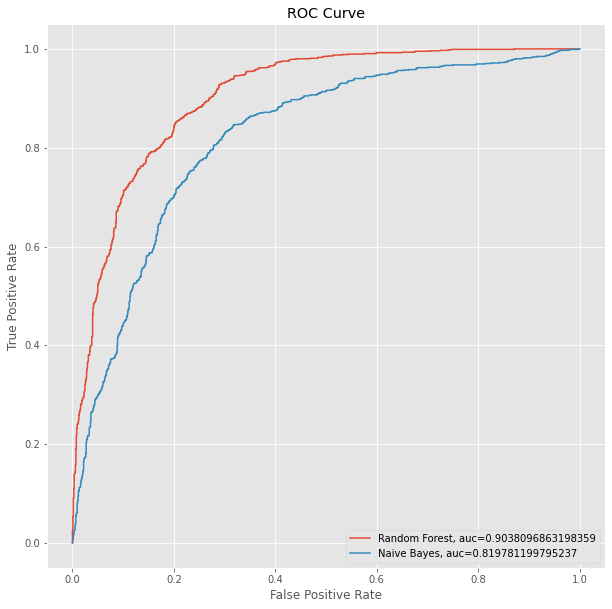

In [62]:
# Comparing ROC Curve
plt.plot(fprrfc,tprrfc,label="Random Forest, auc="+str(aucrfc))
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [63]:
df_compare = X_test.copy()
df_compare['ActualClass'] = y_test
df_compare['RandomForest'] = y_pred1
df_compare['NaiveBayes'] = y_pred_gnb


membuat dataframe yang berisi fitur dan hasil prediksi

In [64]:
df_compare.head()

,contact,default,marital,housing,education,loan,job,poutcome,month,age,balance,day,duration,campaign,pdays,previous,ActualClass,RandomForest,NaiveBayes
8096,0,0,0,0,1,1,3,3,10,56,1866,1,760,1,-1,0,0,1,1
8180,0,0,1,1,0,0,1,3,5,36,106,29,171,13,-1,0,0,0,0
1387,0,0,2,0,2,0,4,3,7,27,831,30,1081,2,-1,0,1,1,1
3047,0,0,1,0,1,0,0,0,2,38,11303,28,473,2,216,2,1,1,1
4670,0,0,1,0,1,0,5,0,8,58,1230,20,420,1,87,1,1,1,1


# **Kesimpulan**

Dari hasil algoritma diatas dapat di simpulkan bahwa pemodelan klasifikasi menggunakan random forest classifier lebih baik dibandingkan dengan naive bayes classifier, karena nilai akurasi, precission, recall, F1 score dan cohens kappa score dari random forest classifier lebih tinggi dibandingkan dengan naive bayes classifier.